In [19]:
import numpy as np
import matplotlib.pyplot as plt


def plot_payoff(payoff_func, strikes, aspect_ratio, figurename, zoom=1.0, num_points=1000):

    # Udregn et "baseline" x-interval ud fra strikes
    if len(strikes) == 1:
        K = strikes[0]
        margin = 0.5 * abs(K) if K != 0 else 1
        S_min_base = K - margin
        S_max_base = K + margin
    else:
        margin = (max(strikes) - min(strikes)) * 0.5
        S_min_base = min(strikes) - margin
        S_max_base = max(strikes) + margin

    # Beregn baseline x_length og center
    x_length_base = S_max_base - S_min_base
    x_center = (S_max_base + S_min_base) / 2

    # Anvend zoom: nyt x_length = baseline * zoom
    x_length = x_length_base * zoom
    S_min = x_center - x_length / 2
    S_max = x_center + x_length / 2

    # Beregn y_length ud fra aspect_ratio
    y_length = x_length / aspect_ratio

    # calculate payoffs
    S = np.linspace(S_min, S_max, num_points)
    payoff = payoff_func(S)

    # adding figur
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(S_min, S_max)
    ax.set_ylim(-y_length / 2, y_length / 2)
    ax.set_aspect('equal', adjustable='box')

    ax.plot(S, payoff, lw=1, color='black')
    ax.axhline(0, color='black', linestyle='-', linewidth=0.5)

    strike_col = 'grey'

    # Tegn lodrette streger og annoter strikes
    for i, K in enumerate(strikes):
        ax.axvline(K, color=strike_col, linestyle='--', linewidth=0.5)
        # ax.text(K, 0, f'$K_{{{i+1}}}$', ha='center', va='bottom', fontsize=12)
        ax.text(K, (-y_length / 2)*0.99, f'$K_{{{i+1}}}$', ha='center', va='bottom', fontsize=12, color = strike_col)

    # Behold akse-titler, men fjern akse-ticks
    # ax.set_xlabel("F")
    # ax.set_ylabel("Payoff")
    ax.text(-0.01, 1, r"$Payoff \longrightarrow$", transform=ax.transAxes, fontsize=12, ha='right', va='top', rotation=90)
    ax.text(-0.01, 0.5, "0", transform=ax.transAxes, fontsize=12, ha='right', va='center')
    # ax.text(1, -0.05, "Forward Price", transform=ax.transAxes, fontsize=12, ha='right', va='center')
    ax.text(0.5, -0.07, r"$F_t$", transform=ax.transAxes, fontsize=12, ha='center', va='center')
    ax.text(0.5, -0.01, "l", transform=ax.transAxes, fontsize=12, ha='center', va='center')
    ax.text(1, -0.07, r"$S_T \longrightarrow$", transform=ax.transAxes, fontsize=12, ha='right', va='center')
    ax.set_xticks([])
    ax.set_yticks([])

    # ax.text(-0.01, 1, r"Payoff $\longrightarrow$", transform=ax.transAxes, fontsize=12, ha='right', va='top', rotation=90)
    # ax.text(-0.01, 0.5, "0", transform=ax.transAxes, fontsize=12, ha='right', va='center')
    # # ax.text(1, -0.05, "Forward Price", transform=ax.transAxes, fontsize=12, ha='right', va='center')
    # ax.text(0.5, -0.07, r"$F_t$", transform=ax.transAxes, fontsize=12, ha='center', va='center')
    # ax.text(0.5, -0.01, "l", transform=ax.transAxes, fontsize=12, ha='center', va='center')
    # ax.text(1.03, -0.005, r"$\longrightarrow F_T$", transform=ax.transAxes, fontsize=12, ha='center', va='center')
    # ax.set_xticks([])
    # ax.set_yticks([])


    ax.grid(True, linestyle='--', linewidth=0.5)
    
    import os
    os.makedirs("figures/payoff_diagrams", exist_ok=True)
    plt.savefig(f"figures/payoff_diagrams/{figurename}.pdf", format="pdf", bbox_inches="tight")

    # plt.savefig(rf"C:\Users\axell\Desktop\CBS\data\Figures\{figurename}.pdf", format="pdf", bbox_inches="tight")
    plt.show()


def short_straddle_payoff(S, K, shift=0):

    return - np.abs(S - K) + shift

def short_strangle_payoff(S, K1, K2, shift=0):

    long_strangle = np.where(S < K1, K1 - S, np.where(S > K2, S - K2, 0))
    
    return - long_strangle + shift

def short_butterfly_payoff(S, K1, K2, K3, shift=0):

    long_butterfly = np.where(S < K1, 0, np.where(S < K2, K1 - S, np.where(S < K3, S - K3, 0)))

    return - long_butterfly + shift

def short_condor_payoff(S, K1, K2, K3, K4, shift=0):

    long_condor = np.where(S<K1, K2-K1, np.where(S<K2, K2-S, np.where(S<K3, 0, np.where(S<K4, S-K3,K4-K3))))

    return -long_condor + shift
    
def short_multi_payoff(S, dK_list, shift=0):

    long_multi = sum([short_strangle_payoff(S, 100-dK, 100+dK, shift=0) for dK in dK_list])
    
    return long_multi - shift


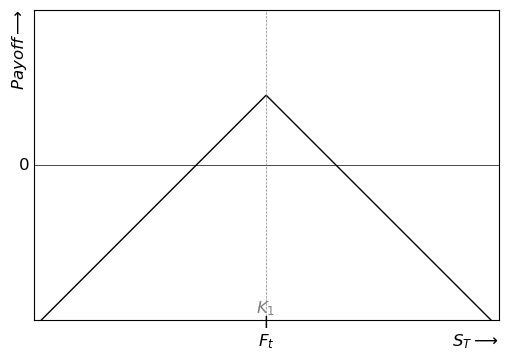

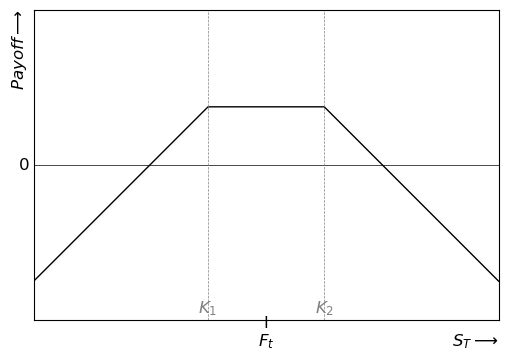

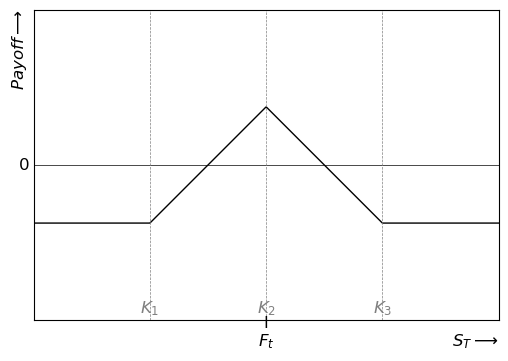

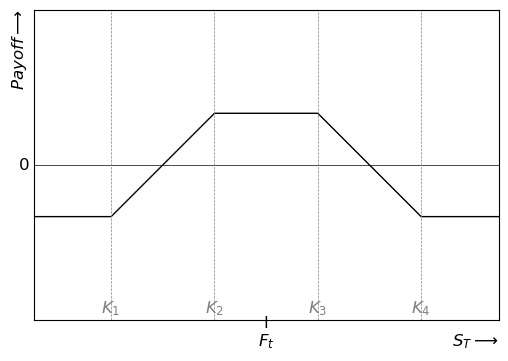

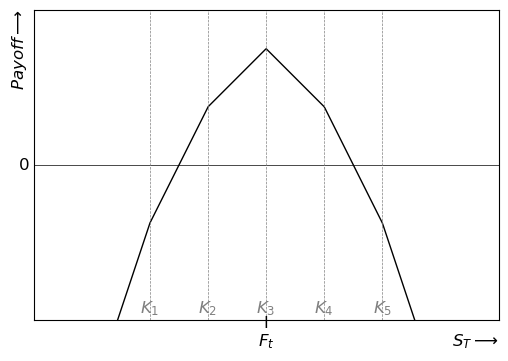

In [24]:
plot_payoff(lambda S: short_straddle_payoff(S, 100, shift=15),
                        strikes=[100], aspect_ratio=1.5, zoom=1, figurename="short_straddle")

plot_payoff(lambda S: short_strangle_payoff(S, 95, 105, shift=5),
                        strikes=[95, 105], aspect_ratio=1.5, zoom=2, figurename="short_strangle")

plot_payoff(lambda S: short_butterfly_payoff(S, 90, 100, 110, shift=-5),
                        strikes=[90, 100, 110], aspect_ratio=1.5, zoom=1, figurename="short_butterfly")

plot_payoff(lambda S: short_condor_payoff(S, 85, 95, 105, 115, shift=5),
                        strikes=[85, 95, 105, 115], aspect_ratio=1.5, zoom=0.75, figurename="short_condor_strangle")

plot_payoff(lambda S: short_multi_payoff(S, [0, 5, 10, 15], shift=-10),
                        strikes=[90, 95, 100, 105, 110], aspect_ratio=1.5, zoom=1, figurename="short_multi")